In [1]:
from IPython.display import Image

# Differentiable molecular dynamics

Bogdan Kirillov     
https://github.com/bakirillov/structbio_sk2020

### Plan

1. Review of differentiable simulations [1];
2. Molecular dynamics in light of automatic differentiation [2];
3. Paper about coarse-grained auto-encoders [3];
4. CycleGAN instead of VAE in 3;
5. Playing with inverse coarse-graining.

### Differentiable programming and differentiable simulations: a quick recap

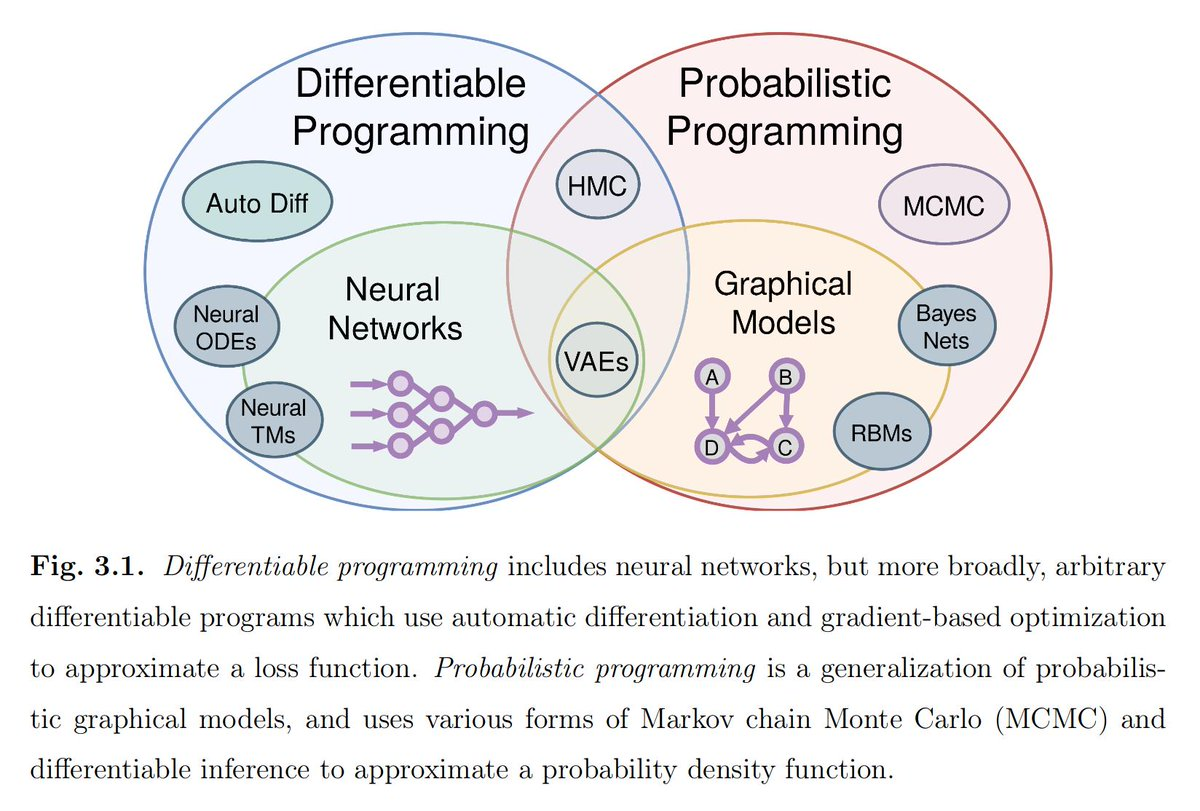

In [4]:
Image("differentiable_probabilistic.jpg")

DiffTaichi

https://arxiv.org/pdf/1910.00935.pdf

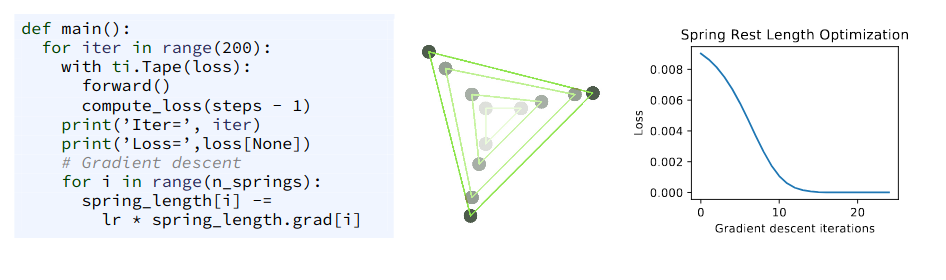

In [3]:
Image("DiffTaichi.png")

Growing Neural Cellular Automata

https://distill.pub/2020/growing-ca/

### Molecular dynamics in light of automatic differentiation

$$
\frac{dp_i}{dt} = -\frac{\partial H}{\partial q_i}
$$

$$
\frac{dq_i}{dt} = \frac{\partial H}{\partial p_i}
$$

Hamiltonian is the sum of position-dependent potential energy and momentum-depentent kinetic energies of each particle:
$$
    H(P,Q) = U(Q) + \sum_i^N \frac{p_i^2}{2m_i}
$$

$$
    H = H_{CG} + H_{bath}
$$

### Intractability of Atomistic Simulations and Coarse-Graining

There is no efficient (i.e. not brute-force) solutions for most atomistic simulations in molecular dynamics.

The simulation problem could be simplified using coarse-graining.

<img src="WangAnimationFine.gif" width="200" align="center">

<img src="WangAnimationCoarse.gif" width="200" align="center">

### Coarse-graining Auto-encoding

$$
    P(x) = \int P(x|z)P(z)dx
$$

$$
    L = \textbf{E}_{Q_{phi}(z|x)}log P_D(x|z) - \textbf{E}_{Q_{phi}(z|x)} log \frac{Q_{\phi}(z|x)}{P(z)}
$$

$$
    E(x): \textbf{R}^{3n} \rightarrow \textbf{R}^{3N}
$$

$$
    z_{ik} = E(x) = \sum^n_{j=1}E_{ij}x{jk} \in \textbf{R^3}, i = 1..N, j = 1..n
$$

$$
    \sum_j E_{ij} = 1, E_{ij} \geq 0
$$

Each atom contributes only to one coarse-grained variable z.

$$
E_{ij} = \frac{C_{ij}}{\sum_j^n C_{ij}}
$$

$$
    \hat{C_j} = onehot(arg max_i log \phi_{ij})
$$

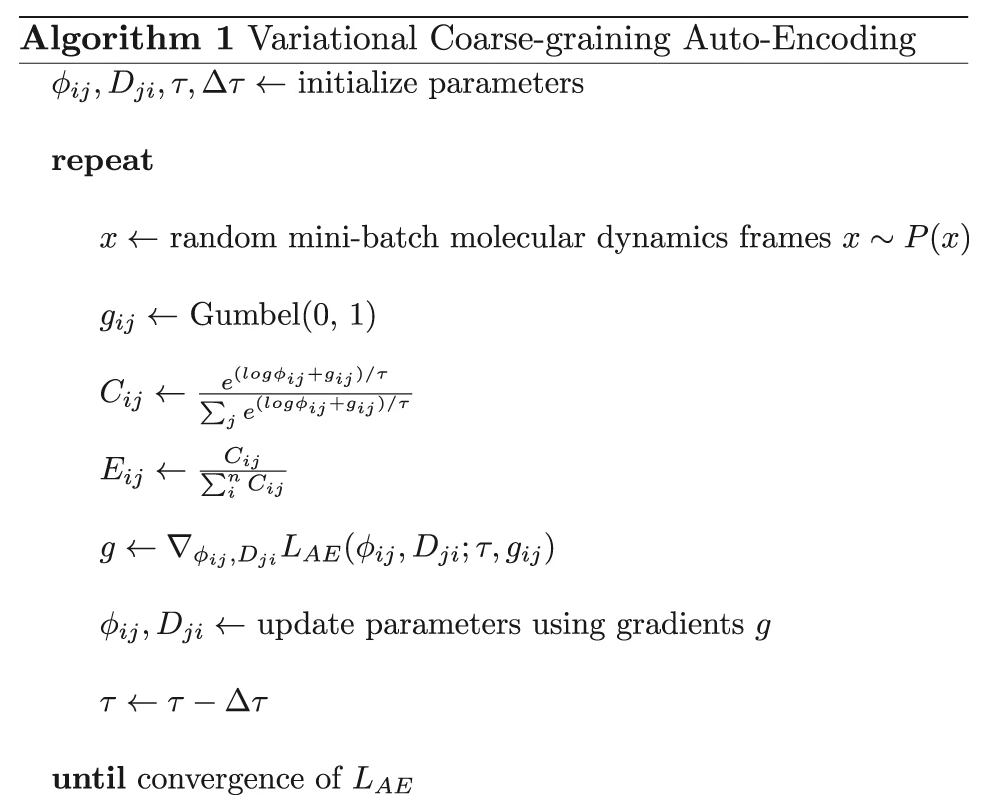

In [2]:
Image("Algorithm1.png")

$$
    P(x) = \frac{1}{Z}exp(-\beta V(x)
$$

$$
A(z) = \frac{1}{\beta}ln P_{CG}(z)
$$

$$
    -\frac{dA}{dz} = F(z) = |-b \nabla V(x)|_{E(x)=z}
$$

$$
    \hat{C} = \frac{\textbf{w}}{\textbf{w}^T\nabla E(x)}, \textbf{w}^T\nabla E(x) \neq 0
$$

$$
    min_{\theta} L_{inst} = min_{\theta} \textbf{E} [F_{inst}(z) + \nabla_{z} V_{CG}(z))^2]
$$

$$
    F_{inst} = F(z) + \epsilon(z)
$$

### CycleVAEGAN vs VAE

CycleGAN

https://github.com/junyanz/CycleGAN     
https://arxiv.org/pdf/1703.10593.pdf

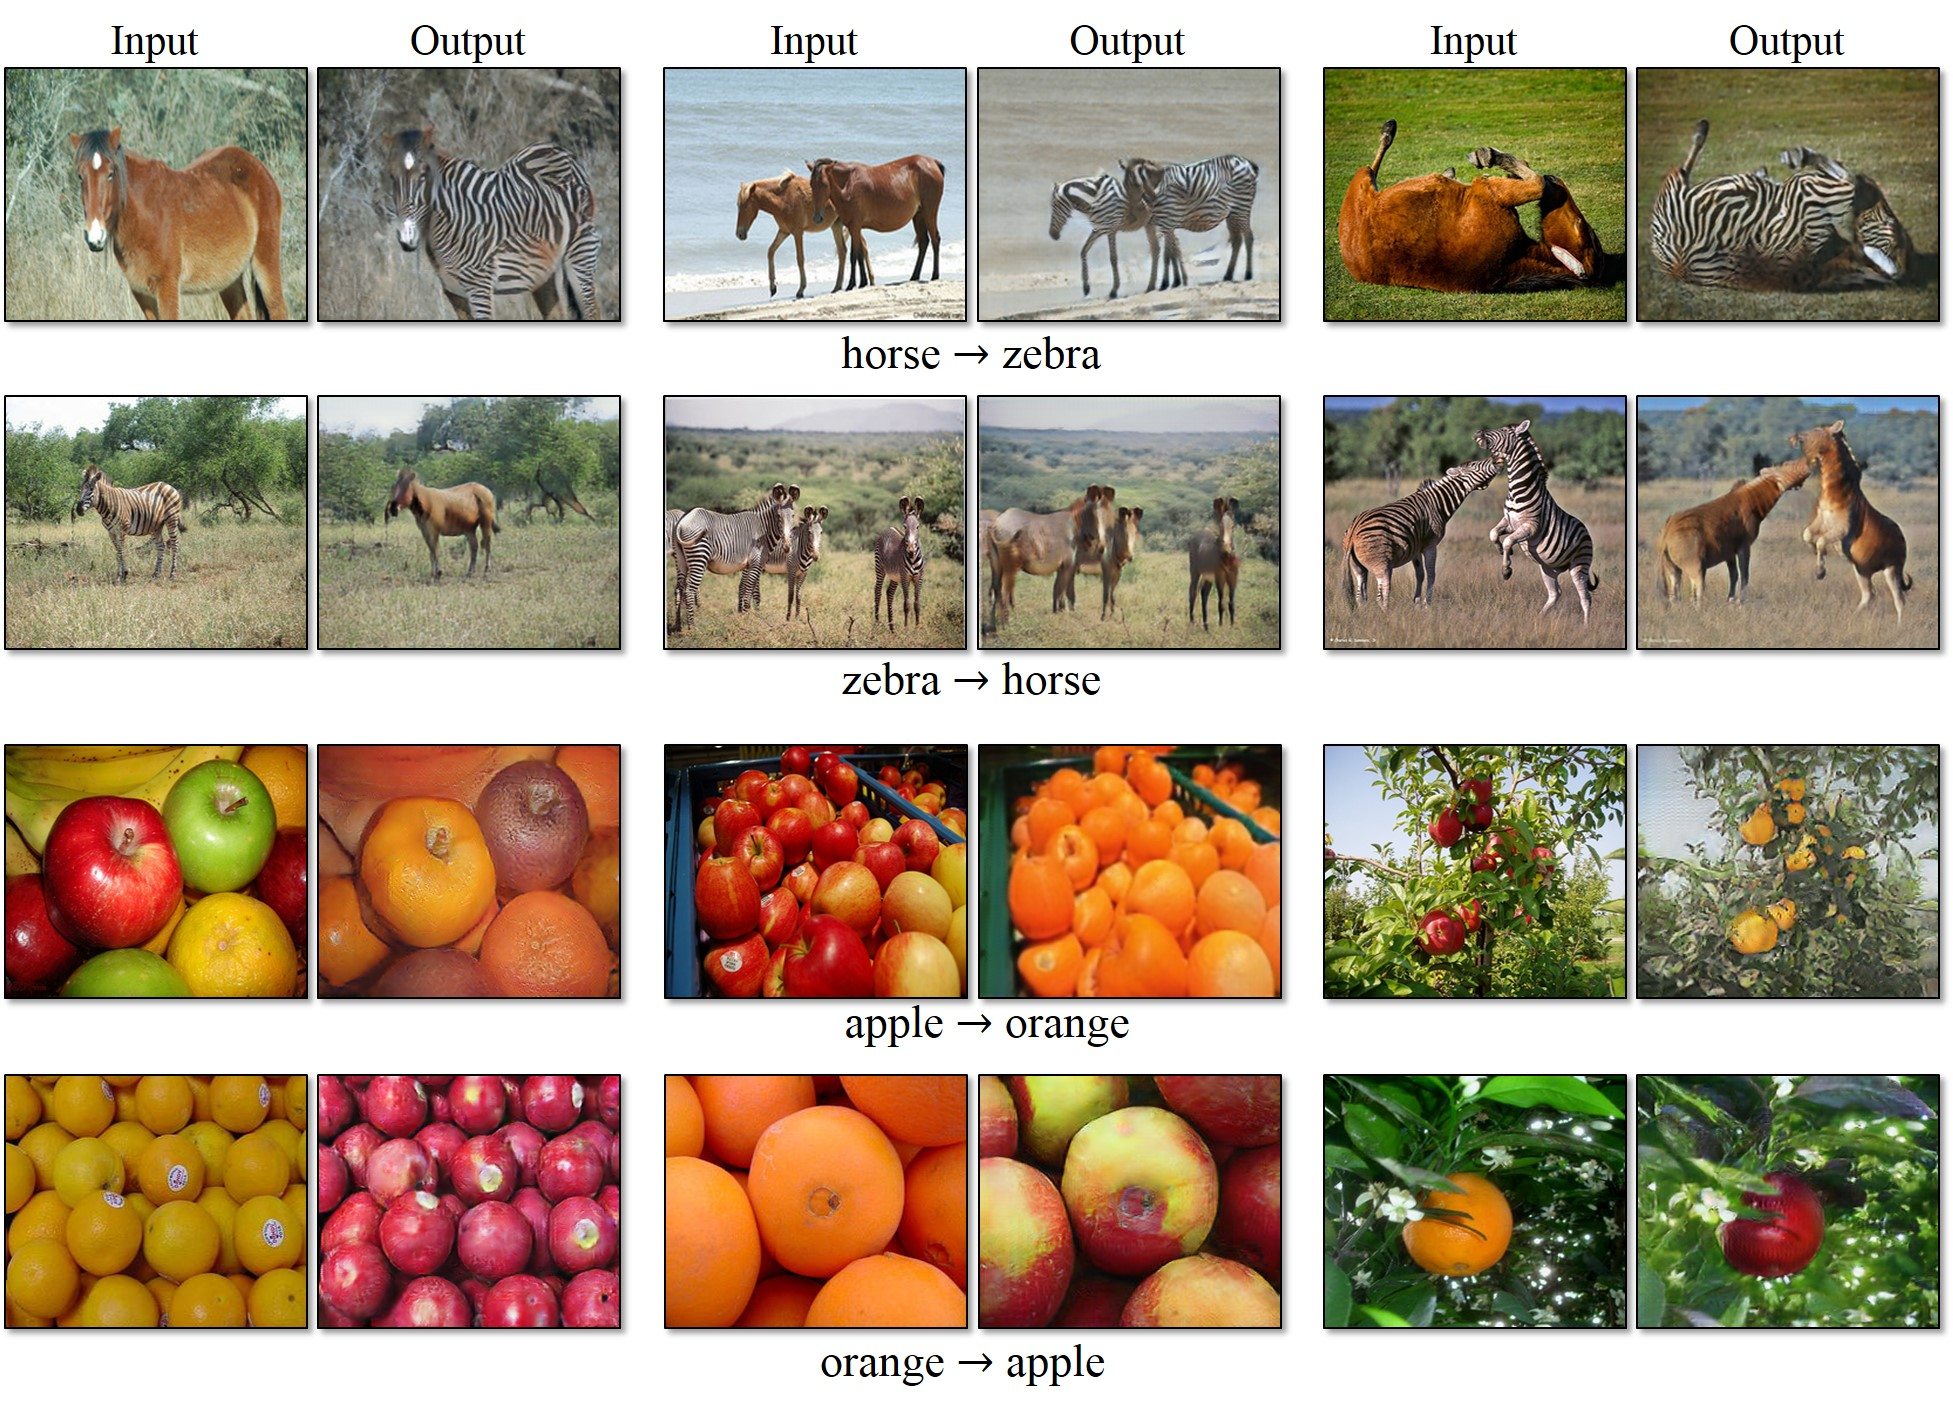

In [5]:
Image("horse_zebra.jpeg")

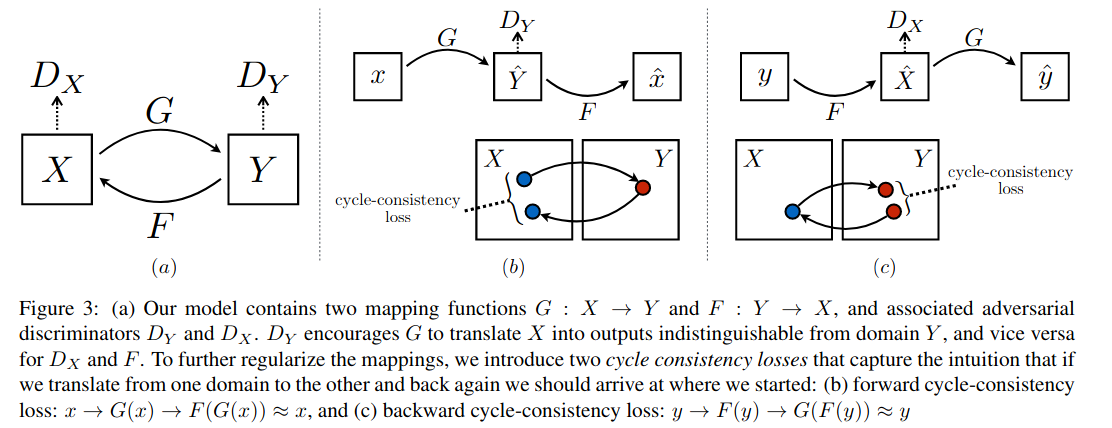

In [6]:
Image("CycleGAN.png")

$$
    L = L_{inst} + L_{D_{c2f}} + L_{D_{f2c}}
$$

$$
    L_{D_{y \in (c2f, f2c)}} = -\frac{1}{N}\sum_{i=1}^N y_{i} log(\hat{y_i}) + (1-y_{i}) log(1-\hat{y_i}) 
$$

### Results

<img src="pics/Mine.gif" width="400" align="center">

### References

1. A beginner's guide to differentiable programming, https://pathmind.com/wiki/differentiableprogramming
2. Wang et al, 2020, Differentiable Molecular Simulations for Control and Learning https://arxiv.org/pdf/2003.00868.pdf     
3. Wang et al, 2019, Coarse-graining auto-encoders for molecular dynamics https://www.nature.com/articles/s41524-019-0261-5    